In [165]:
import numpy as np
import matplotlib.pyplot as plt

In [166]:
raw1 = np.loadtxt('pixel_1.txt',dtype=float)
raw32 = np.loadtxt('pixel_32.txt',dtype=float)
raw65 = np.loadtxt('pixel_65.txt',dtype=float)

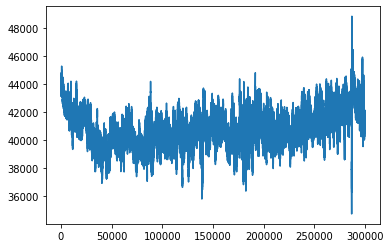

In [167]:
raw = raw1 # first probe pixel
# raw = raw65 # frist reference pixel
# raw = raw1/raw65 # corrected intensity from first probe/ref pixel pair
plt.plot(raw)

In [168]:
raw = raw-raw.mean() # just correcting for mean, as in Kearns et al.

In [169]:
corr = np.correlate(raw,raw,'full')
middle = len(corr)//2
corrn = corr/corr[middle] # normalized to 1 at point zero (which is in the middle of the symmetric result)

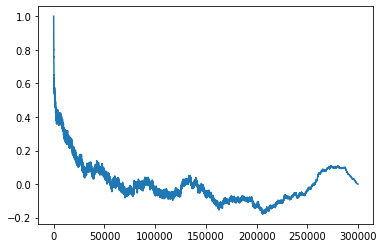

In [170]:
plt.plot(corrn[middle:])

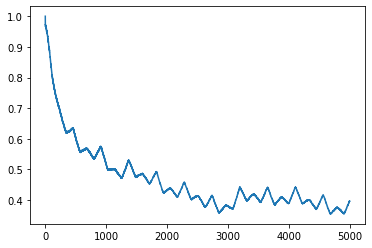

In [171]:
plt.plot(corrn[middle:middle+5000])